# **라이브러리**

In [40]:
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from google.colab import drive

# **데이터**

In [41]:
if not os.path.exists('/content/drive'):
    drive.mount('/content/drive')
else:
    print("드라이브 마운트 됨")

Train = pd.read_csv('/content/drive/MyDrive/머신러닝 실습/데이터/train.csv')
Test = pd.read_csv('/content/drive/MyDrive/머신러닝 실습/데이터/test.csv')

# 분리 되지 않은 데이터는 대문자 표기
X_Train = Train.iloc[:, 1:].values  # 이미지 데이터
Y_Train = Train.iloc[:, 0].values   # 라벨

X_Test = Test.iloc[:, 0:].values    # 이미지 데이터

print("X_Train shape\t:", X_Train.shape)
print("Y_Train shape\t:", Y_Train.shape)
print("\nX_Test shape\t:", X_Test.shape)

드라이브 마운트 됨
X_Train shape	: (42000, 784)
Y_Train shape	: (42000,)

X_Test shape	: (28000, 784)


## **정규화**

In [42]:
# 정규화된 데이터는 _Scaled 표기
scaler = StandardScaler()
X_Train_Scaled = scaler.fit_transform(X_Train)
X_Test_Scaled = scaler.transform(X_Test)

# 트레인

## **데이터 분리**

In [43]:
# 인덱스  분리
indices = list(range(len(X_Train)))
train_idx, val_idx = train_test_split(indices, test_size = 0.2, random_state = None)

# 분리된 데이터는 소문자 표기
x_train_scaled = X_Train_Scaled[train_idx]
x_val_scaled   = X_Train_Scaled[val_idx]

x_train = X_Train[train_idx]
x_val   = X_Train[val_idx]

y_train = Y_Train[train_idx]
y_val   = Y_Train[val_idx]

print("x_train_scaled shape\t:", x_train_scaled.shape)
print("y_train shape\t\t:", y_train.shape)
print("\nx_val_scaled shape\t:", x_val_scaled.shape)
print("y_val shape\t\t:", y_val.shape)

x_train_scaled shape	: (33600, 784)
y_train shape		: (33600,)

x_val_scaled shape	: (8400, 784)
y_val shape		: (8400,)


## **이미지 시각화**

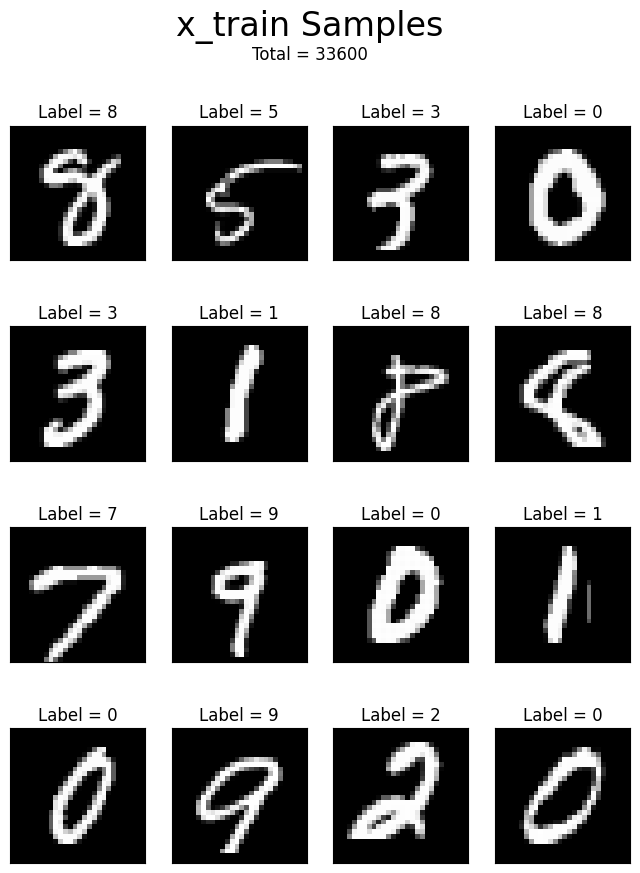

In [44]:
num_samples = 16
random_indices = np.random.choice(len(x_train), size = num_samples, replace = False)

fig, ax = plt.subplots(4, 4, figsize = (8, 10))
fig.suptitle("x_train Samples", fontsize = 24)
fig.text(0.5, 0.93, f"Total = {len(x_train)}", ha = "center", fontsize = 12)
for i in range(4):
  for j in range(4):
    idx = random_indices[i*4 + j]
    ax[i, j].imshow(x_train[idx].reshape(28, 28), cmap = 'gray')
    ax[i, j].set_title('Label = %s' % (y_train[idx]))
    ax[i, j].set_xticks([])
    ax[i, j].set_yticks([])

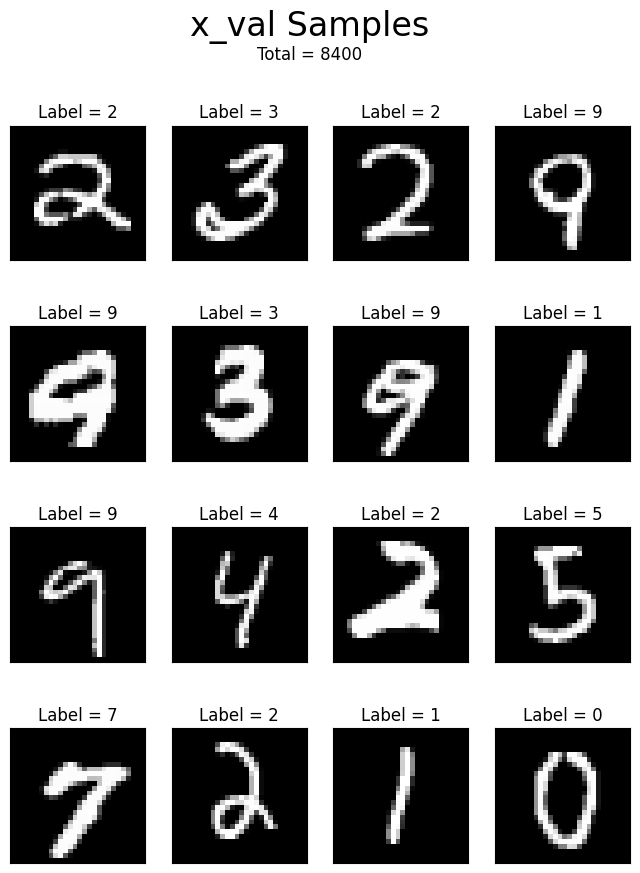

In [45]:
num_samples = 16
random_indices = np.random.choice(len(x_val), size = num_samples, replace = False)

fig, ax = plt.subplots(4, 4, figsize = (8, 10))
fig.suptitle("x_val Samples", fontsize = 24)
fig.text(0.5, 0.93, f"Total = {len(x_val)}", ha = "center", fontsize = 12)
for i in range(4):
  for j in range(4):
    idx = random_indices[i*4 + j]
    ax[i, j].imshow(x_val[idx].reshape(28, 28), cmap = 'gray')
    ax[i, j].set_title('Label = %s' % (y_val[idx]))
    ax[i, j].set_xticks([])
    ax[i, j].set_yticks([])

## **모델 학습**

In [46]:
start = time.time()
clf = LogisticRegression(C = 1, class_weight = None, dual = False, fit_intercept = True,
                         intercept_scaling = 1, l1_ratio = None, max_iter = 100, n_jobs = None, penalty = 'l2',
                         random_state = None, solver = 'lbfgs', tol = 0.001, verbose = False,
                         warm_start = False)
clf.fit(x_train_scaled, y_train)
end = time.time()

print(f"학습 시간\t: {end - start:.2f}초")
print("반복 횟수\t:", clf.n_iter_)

학습 시간	: 12.62초
반복 횟수	: [46]


## **검증 데이터 예측 및 정확도 평가**

In [47]:
y_val_pred = clf.predict(x_val_scaled)

print("모델 정확도 : %.3f" %(accuracy_score(y_val, y_val_pred)))

모델 정확도 : 0.915


### **옳게 분류한 이미지**

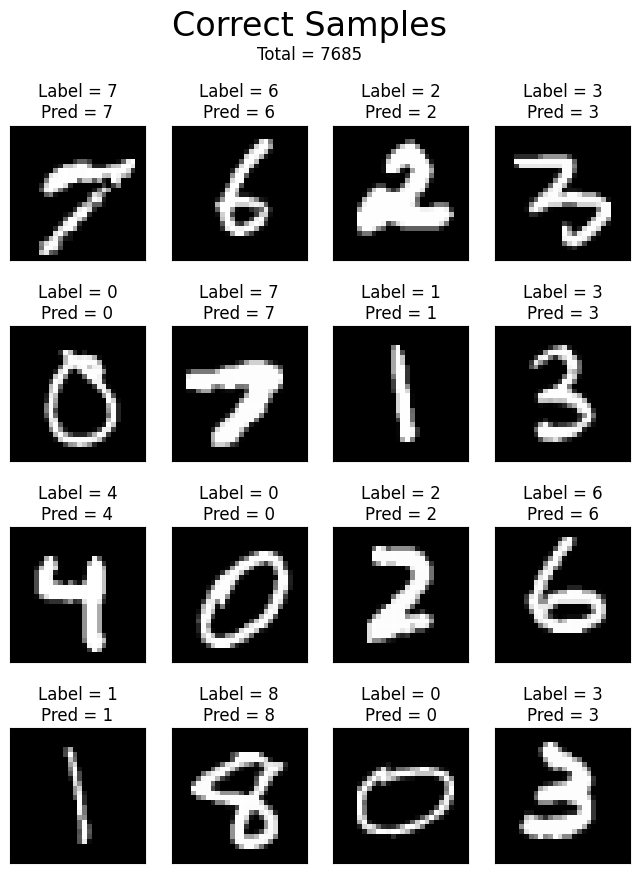

In [48]:
x_val_correct = x_val[y_val == y_val_pred, :]
y_val_correct = y_val[y_val == y_val_pred]
y_val_pred_correct = y_val_pred[y_val == y_val_pred]

num_samples = 16
random_indices = np.random.choice(len(x_val_correct), size = num_samples, replace = False)

fig, ax = plt.subplots(4, 4, figsize=(8, 10))
fig.suptitle("Correct Samples", fontsize = 24)
fig.text(0.5, 0.93, f"Total = {len(x_val_correct)}", ha = "center", fontsize = 12)
for i in range(4):
    for j in range(4):
        idx = random_indices[i * 4 + j]
        ax[i, j].imshow(x_val_correct[idx].reshape(28, 28), cmap = 'gray')
        ax[i, j].set_title(f"Label = {y_val_correct[idx]}\nPred = {y_val_pred_correct[idx]}")
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])

### **잘못 분류한 이미지**

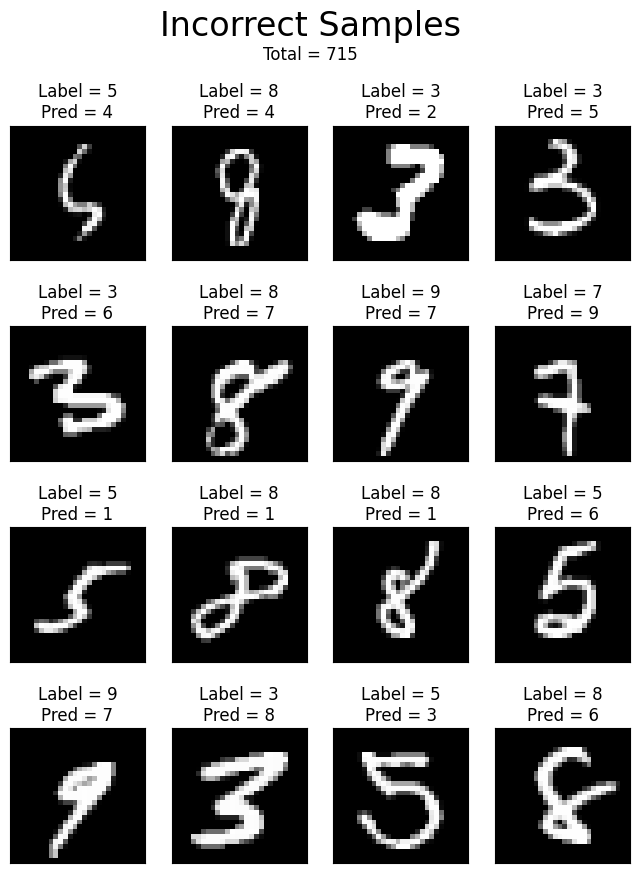

In [49]:
x_val_incorrect = x_val[y_val != y_val_pred, :]
y_val_incorrect = y_val[y_val != y_val_pred]
y_val_pred_incorrect = y_val_pred[y_val != y_val_pred]

num_samples = 16
random_indices = np.random.choice(len(x_val_incorrect), size = num_samples, replace = False)

fig, ax = plt.subplots(4, 4, figsize=(8, 10))
fig.suptitle("Incorrect Samples", fontsize = 24)
fig.text(0.5, 0.93, f"Total = {len(x_val_incorrect)}", ha = "center", fontsize = 12)
for i in range(4):
    for j in range(4):
        idx = random_indices[i * 4 + j]
        ax[i, j].imshow(x_val_incorrect[idx].reshape(28, 28), cmap = 'gray')
        ax[i, j].set_title(f"Label = {y_val_incorrect[idx]}\nPred = {y_val_pred_incorrect[idx]}")
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])

# 테스트 데이터 예측

In [50]:
Y_Test_Pred = clf.predict(X_Test)
print("데이터 예측 :", Y_Test_Pred )

데이터 예측 : [2 0 9 ... 3 9 2]


## **예측한 이미지**

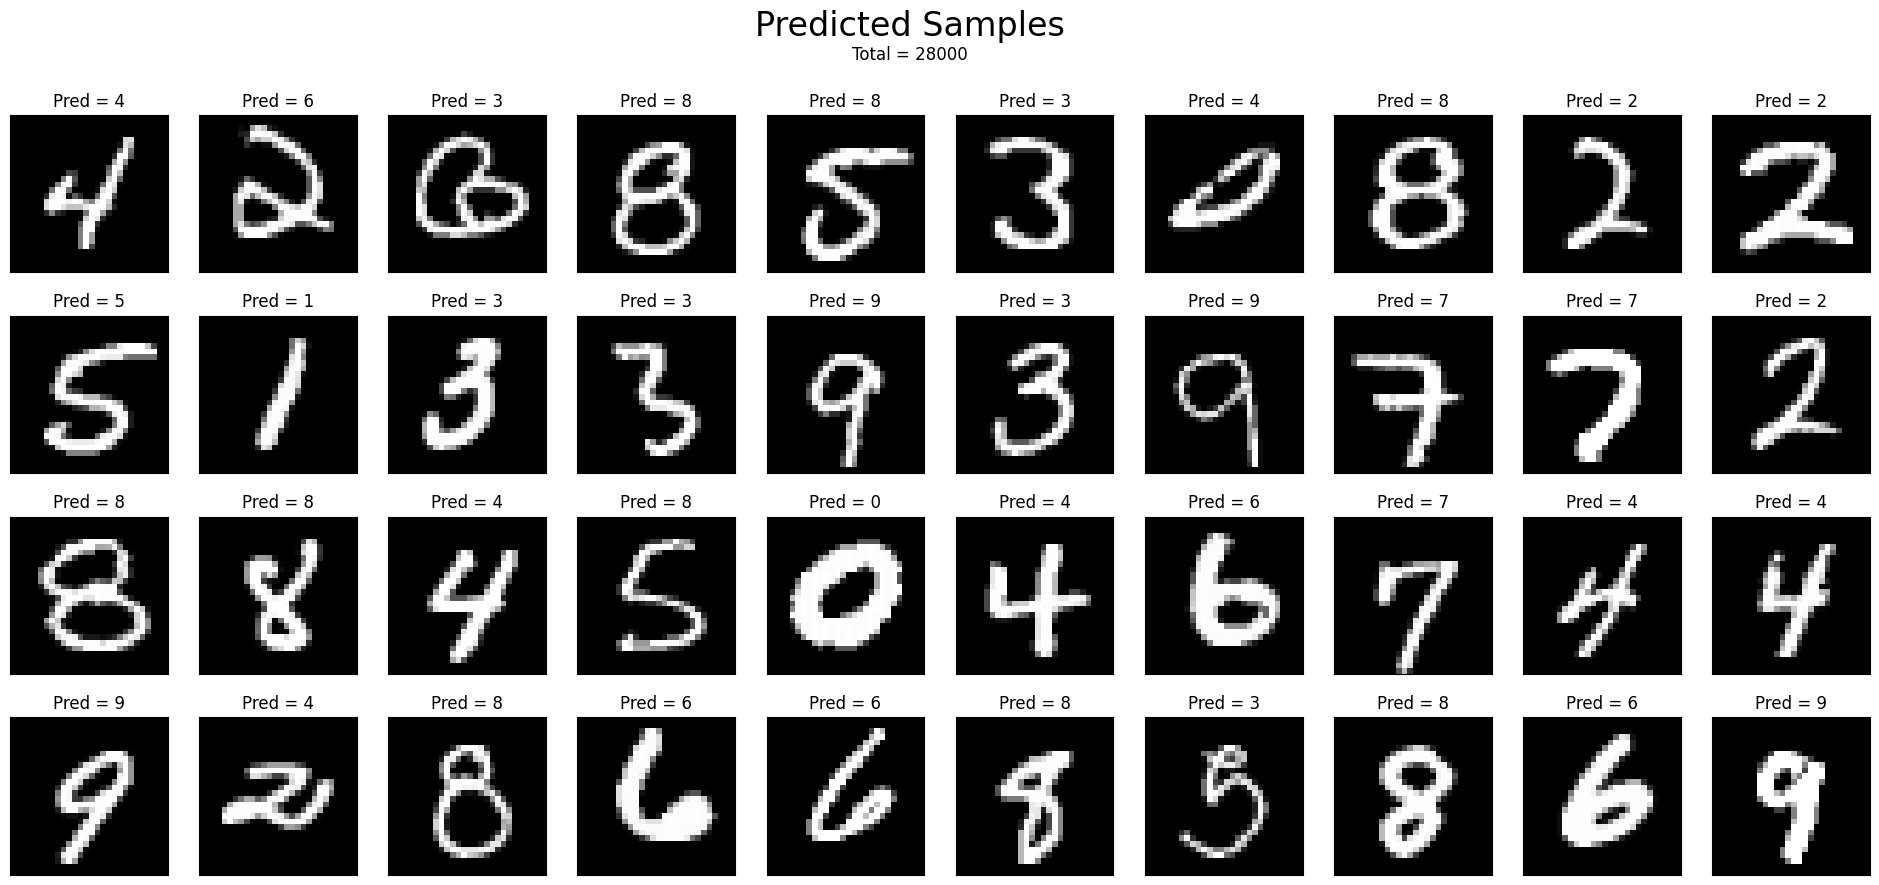

In [51]:
num_samples = 40
random_indices = np.random.choice(len(Y_Test_Pred), size = num_samples, replace = False)

fig, ax = plt.subplots(4, 10, figsize=(24, 10))
fig.suptitle("Predicted Samples", fontsize = 24)
fig.text(0.5, 0.93, f"Total = {len(Y_Test_Pred)}", ha = "center", fontsize = 12)
for i in range(4):
    for j in range(10):
        idx = random_indices[i * 10 + j]
        ax[i, j].imshow(X_Test[idx].reshape(28, 28), cmap = 'gray')
        ax[i, j].set_title(f"Pred = {Y_Test_Pred[idx]}")
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])

## **예측값 내보내기**

In [53]:
sample_submission = pd.read_csv('/content/drive/MyDrive/머신러닝 실습/과제/3주차/sample_submission.csv')
sample_submission['Label'] = Y_Test_Pred
sample_submission.to_csv('/content/drive/MyDrive/머신러닝 실습/과제/3주차/sample_submission.csv', index = False)